In [1]:
import matplotlib.pyplot as plt
from math import inf
import os

# Upper Envelope of Some Linear Functions
Johana A • Emma A

In [2]:
class linear_function:
    
    def __init__(self, a, b):
        self.a = a
        self.b = b
        
    def __repr__(self):
        if self.b < 0:
            return str(self.a) + "x " + str(self.b)
        else:
            return str(self.a) + "x + " + str(self.b)

class envelope:
    
    def __init__(self, functions = [], breakpoints = []):
        self.functions = functions
        self.breakpoints = breakpoints
    
    def __repr__(self):
        s = "functions : "
        for f in self.functions:
            s = s + str(f) + "  "
        s = s + "\nbreakpoints : "
        for bp in self.breakpoints:
            s = s + str(bp) + "  "
        return s
    
    def fig(self, initial_functions = []):
        plt.clf()
        if(len(self.breakpoints) == 0):
            lower = -1
            upper = 1
        elif(len(self.breakpoints) == 1):
            lower = self.breakpoints[0] - 1
            upper = self.breakpoints[0] + 1
        else:
            margin = (self.breakpoints[-1] - self.breakpoints[0]) / 4
            lower = self.breakpoints[0] - margin
            upper = self.breakpoints[-1] + margin
        intervals = [lower] + self.breakpoints + [upper]
        for f in initial_functions:
            plt.plot([lower, upper], [f.a * lower + f.b, f.a * upper + f.b], color = "black", linewidth = 1)
        for i in range(len(intervals) - 1):
            x1 = intervals[i]
            x2 = intervals[i+1]
            f = self.functions[i]
            plt.plot([x1,x2], [f.a * x1 + f.b, f.a * x2 + f.b], color = "red", linewidth = 2)
        bp_values = []
        for i in range(len(self.breakpoints)):
            f = self.functions[i]
            bp = self.breakpoints[i]
            bp_values.append(f.a * bp + f.b)
        plt.scatter(self.breakpoints, bp_values, color = "brown",zorder = 3)
        return plt

In [3]:
def get_linear_functions(filename):
    file = open(filename, 'r')
    functions = []
    for line in file:
        f = [float(elem) for elem in line.split(" ")]
        functions.append(linear_function(f[0], f[1]))
    file.close()
    return functions

## Divide and Conquer

In [4]:
def upper_envelope_DC(linear_functions):
    
    #base case
    if len(linear_functions) <= 1:
        return envelope(linear_functions)

    #divide into two sub-problems
    env1 = upper_envelope_DC(linear_functions[:int(len(linear_functions)/2)])
    env2 = upper_envelope_DC(linear_functions[int(len(linear_functions)/2):])
    
    breakpoints = env1.breakpoints + env2.breakpoints
    breakpoints.sort()
    #add -/+infinity to get all possible intervals
    breakpoints = [-inf] + breakpoints + [inf]
    env1.breakpoints = [-inf] + env1.breakpoints + [inf]
    env2.breakpoints = [-inf] + env2.breakpoints + [inf]
    
    new_functions = []
    new_breakpoints = []
    
    #sweep through all intervals
    for i in range(len(breakpoints) - 1):
        interval = [breakpoints[i], breakpoints[i+1]]
        
        #get associated functions from each envelope
        for j in range(len(env1.breakpoints) - 1):
            if interval[0] >= env1.breakpoints[j] and interval[1] <= env1.breakpoints[j+1]:
                f1 = env1.functions[j]
                break
        for j in range(len(env2.breakpoints) - 1):
            if interval[0] >= env2.breakpoints[j] and interval[1] <= env2.breakpoints[j+1]:
                f2 = env2.functions[j]
                break
        
        intersection = (f2.b - f1.b) / (f1.a - f2.a)
        
        #if f1 and f2 do not intersect in the interval
        if not(intersection >= interval[0] and intersection < interval[1]):

            #compare f1(x) and f2(x) to determine which function is above
            if interval[0] == -inf and interval[1] == inf :
                x = 0
            elif interval[0] == -inf :
                x = interval[1] - 1
            elif interval[1] == inf :
                x = interval[0] + 1
            else :
                x = (interval[0] + interval[1]) / 2
            
            #if f is above, add f and associated breakpoints to solution
            if f1.a * x + f1.b >= f2.a * x + f2.b :
                if len(new_functions) == 0 or new_functions[-1] != f1 :
                    new_functions.append(f1) #add f if not already in solution
                if interval[1] != inf and interval[1] == env1.breakpoints[env1.functions.index(f1) + 1]:
                    if len(new_breakpoints) == 0 or new_breakpoints[-1] != interval[1]: #if not already in solution
                        new_breakpoints.append(interval[1]) #add breakpoint if it is reached in the interval
            else :
                if len(new_functions) == 0 or new_functions[-1] != f2 :
                    new_functions.append(f2)
                if interval[1] != inf and interval[1] == env2.breakpoints[env2.functions.index(f2) + 1] :
                    if len(new_breakpoints) == 0 or new_breakpoints[-1] != interval[1]:
                        new_breakpoints.append(interval[1])
        
        #if f1 and f2 intersect in the interval
        else :

            #compare f1 and f2 to determine which function is above after the intersection
            if interval[1] == inf :
                x = intersection + 1
            else :
                x = (intersection + interval[1]) / 2
            
            #if f is above, add f and associated breakpoints to solution
            if f1.a * x + f1.b >= f2.a * x + f2.b :
                if len(new_breakpoints) == 0 or new_breakpoints[-1] != intersection: #if intersection not already in solution
                    if len(new_functions) == 0 or new_functions[-1] != f2 : #if not already in solution
                        new_functions.append(f2) #add function that was above before the intersection
                    new_breakpoints.append(intersection) #add intersection as breakpoint
                new_functions.append(f1) #add f to solution
                if interval[1] != inf and interval[1] == env1.breakpoints[env1.functions.index(f1) + 1] :
                    if len(new_breakpoints) == 0 or new_breakpoints[-1] != interval[1]: #if not already in solution
                        new_breakpoints.append(interval[1]) #add breakpoint if it is reached in the interval
            else :
                if len(new_breakpoints) == 0 or new_breakpoints[-1] != intersection:
                    if len(new_functions) == 0 or new_functions[-1] != f1 :
                        new_functions.append(f1)
                    new_breakpoints.append(intersection)
                new_functions.append(f2)
                if interval[1] != inf and interval[1] == env2.breakpoints[env2.functions.index(f2) + 1] :
                    if len(new_breakpoints) == 0 or new_breakpoints[-1] != interval[1]:
                        new_breakpoints.append(interval[1])
    
    return envelope(new_functions, new_breakpoints)

set2.txt


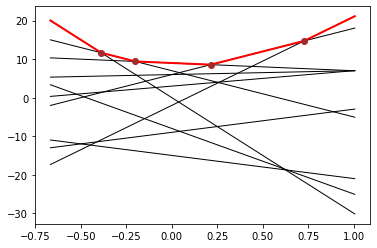

set3.txt


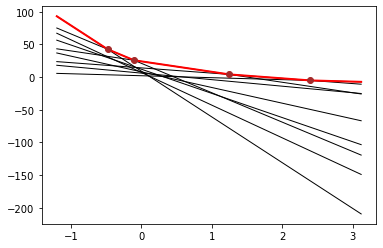

set1.txt


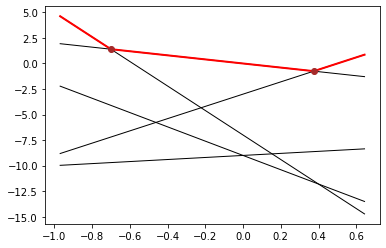

set4.txt


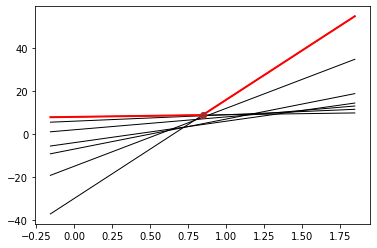

set5.txt


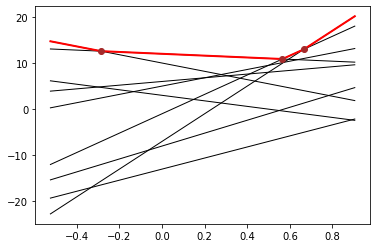

set7.txt


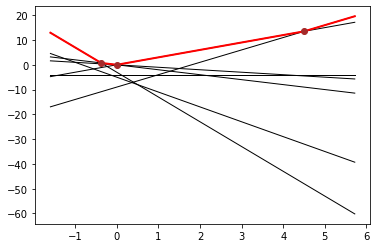

set6.txt


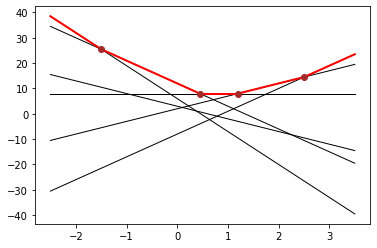

set8.txt


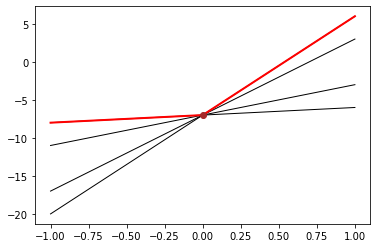

set9.txt


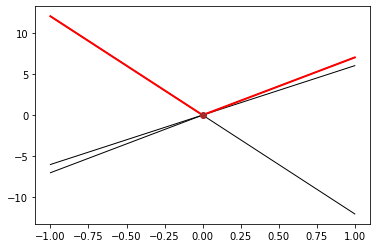

set10.txt


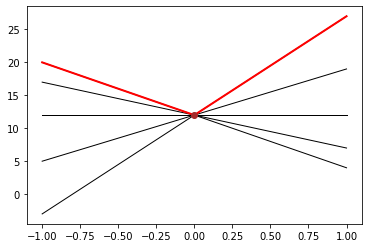

set11.txt


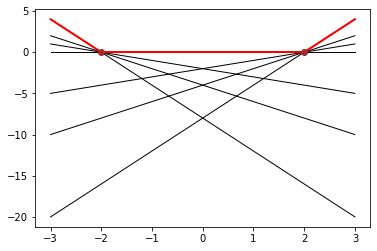

In [5]:
files = os.listdir("UELF_examples")

for file in files:
    functions = get_linear_functions("UELF_examples/" + file)
    print(file)
    env = upper_envelope_DC(functions)
    fig = env.fig(functions)
    t = file[:-4] + '.png'
    fig.savefig("Output_examples/" + t)
    fig.show()

## Dynamic Programming

In [6]:
def upper_envelope_DP(linear_functions):
    if len(linear_functions) == 0 :
        return envelope()
    
    envelopes = [envelope([linear_functions[0]])]

    for f in linear_functions[1:] :
        env = envelopes[-1] #last computed envelope

        breakpoints = [-inf] + env.breakpoints + [inf]
        intersections = []
            
        #compute intersections between f and env
        for i in range(len(env.functions)) :
            g = env.functions[i]
            interval = [breakpoints[i], breakpoints[i+1]]
            intersection = (g.b - f.b) / (f.a - g.a)

            #if f and g intersect in the interval, f intersects env
            if intersection >= interval[0] and intersection < interval[1]:
                intersections.append([i, intersection])
            
        #if f and env don't intersect, f is not part of the envelope
        if len(intersections) == 0 :
            new_functions = env.functions
            new_breakpoints = breakpoints
            
        #if f and env intersect only once
        elif len(intersections) == 1 :
            i = intersections[0][0]
            g = env.functions[i]
            intersection = intersections[0][1]
                
            #if f is above before the intersection
            if f.a * (intersection - 1) + f.b > g.a * (intersection - 1) + g.b :
                #if f and g intersect on the left breakpoint of g
                if intersection == breakpoints[i] :
                    #keep function that is above between f and the function before g
                    h = env.functions[i-1]
                    if h.a * (intersection - 1) + h.b >= f.a * (intersection - 1) +f.b :
                        new_functions = env.functions
                        new_breakpoints = breakpoints
                    else :
                        new_functions = [f] + env.functions[i+1:]
                        new_breakpoints = breakpoints[i:]
                #if f and g don't intersect on a breakpoint, replace functions before intersection by f
                else :
                    new_functions = [f] + env.functions[i:]
                    new_breakpoints = [intersection] + breakpoints[i+1:]
                        
            #if f is above after the intersection
            else :
                #if f and g intersect on the left breakpoint of g, remove g from the envelope function
                if intersection == breakpoints[i]:
                    new_functions = env.functions[:i] + [f]
                    new_breakpoints = breakpoints[:i+1]
                #otherwise, keep g and only remove functions after intersection
                else :
                    new_functions = env.functions[:i+1] + [f]
                    new_breakpoints = breakpoints[:i+1] + [intersection]
            
        #if f and env intersect twice, f is part of the envelope (between the two intersections)
        else :
            i1 = intersections[0][0]
            i2 = intersections[1][0]
            #if f intersects env on a left breakpoint, remove corresponding function
            if intersections[0][1] == breakpoints[i1]:
                new_functions = env.functions[:i1] + [f] + env.functions[i2:]
                new_breakpoints = breakpoints[:i1+1] + [intersections[1][1]] + breakpoints[i2+1:]
            #otherwise, only remove functions between the two intersections
            else :
                new_functions = env.functions[:i1+1] + [f] + env.functions[i2:]
                new_breakpoints = breakpoints[:i1+1] + [intersections[0][1], intersections[1][1]] + breakpoints[i2+1:]
                
        #remove -inf and inf from breakpoints
        if -inf in new_breakpoints :
            new_breakpoints.remove(-inf)
        if inf in new_breakpoints :
            new_breakpoints.remove(inf)
                    
        envelopes.append(envelope(new_functions, new_breakpoints))
    
    return envelopes[-1]

set2.txt


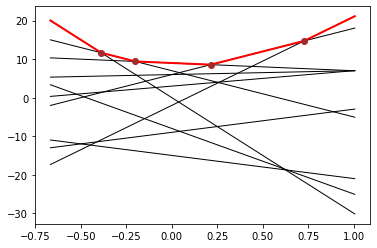

set3.txt


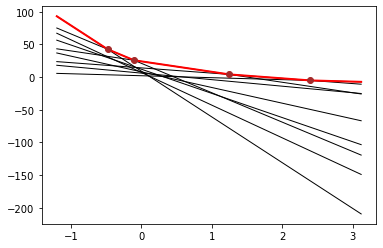

set1.txt


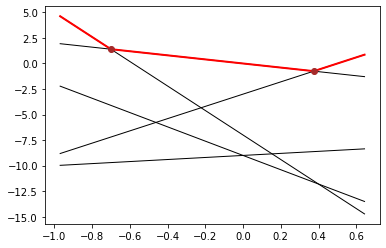

set4.txt


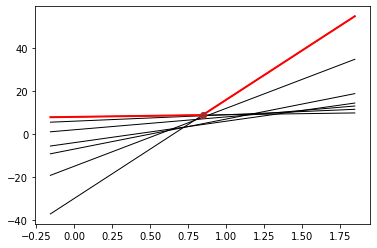

set5.txt


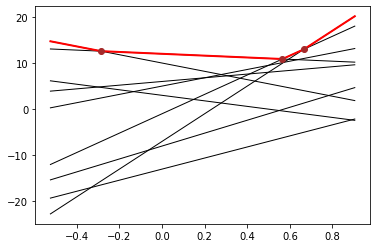

set7.txt


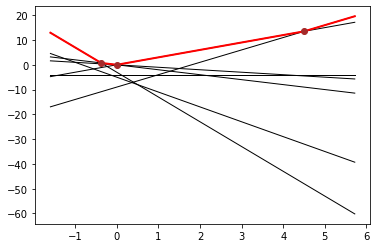

set6.txt


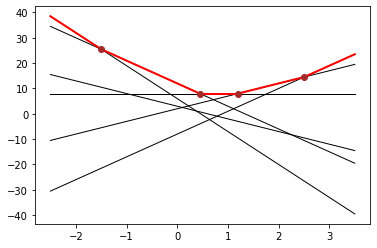

set8.txt


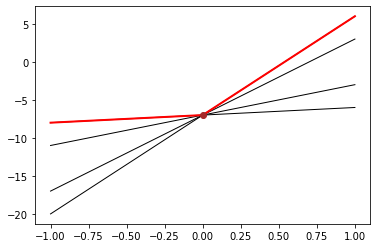

set9.txt


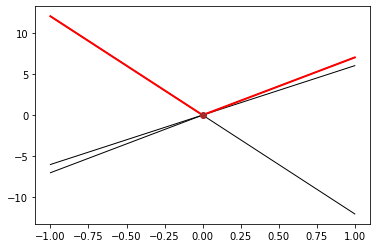

set10.txt


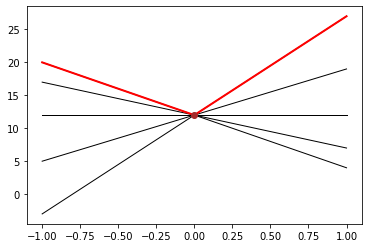

set11.txt


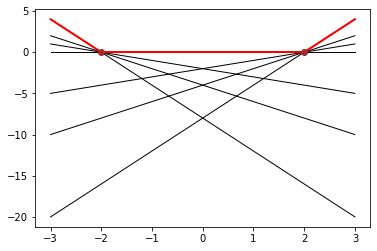

In [7]:
files = os.listdir("UELF_examples")

for file in files:
    functions = get_linear_functions("UELF_examples/" + file)
    print(file)
    env = upper_envelope_DP(functions)
    fig = env.fig(functions)
    fig.show()